In [1]:
import pmlib
import numpy as np

In [2]:
# list pmlib functionalities
dir(pmlib)


['AppleTasting',
 'BartokPM',
 'BasicFeedexp3',
 'BasicPolicy',
 'BernoulliBandit',
 'BinaryUtilityDuelingBanditPM',
 'DominationPolytope',
 'DynamicPricingPM',
 'GeneralFeedexp3',
 'Intractable',
 'LabelEfficientPrediction',
 'Neighbourhood',
 'PMGame',
 'Pool',
 'Rex3',
 'StrictDominationPolytope',
 '__author__',
 '__builtins__',
 '__copyright__',
 '__date__',
 '__doc__',
 '__email__',
 '__file__',
 '__license__',
 '__name__',
 '__package__',
 '__path__',
 '__status__',
 '__version__',
 'areNeighbours',
 'arm_reward',
 'basicFeedexp3',
 'benchmark_games',
 'benchmark_names',
 'check_matrices_transformation',
 'choice',
 'cpu_count',
 'domination_matrix',
 'eval_func_tuple',
 'eval_policy',
 'eval_policy_once',
 'eval_policy_parallel',
 'exp',
 'games',
 'generalFeedexp3',
 'init_plot',
 'interFacePolytope',
 'isDegenerated',
 'isNonDominated',
 'isParetoOptimal',
 'isStrictlyNonDominated',
 'is_linear_comb',
 'is_set',
 'linprog',
 'log',
 'logsumexp',
 'np',
 'optimal_Feedexp3_param

In [3]:
# We create a PM instance for a stochatic 3-armed Bernoulli Multi-Armed Bandit (MAB)
# the parameters are the independent expected arm rewards
print "** Bandit problem"
bandit = pmlib.BernoulliBandit([0.75,0.5,0.25])

** Bandit problem


***** 3-armed bandit *****
Actions: N=3 Outcomes: M=8

Loss Matrix (with actions as row indices and outcomes as column indices):


,000,001,010,011,100,101,110,111
arm 0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
arm 1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
arm 2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,000,001,010,011,100,101,110,111
arm 0,loss,loss,loss,loss,win,win,win,win
arm 1,loss,loss,win,win,loss,loss,win,win
arm 2,loss,win,loss,win,loss,win,loss,win


Feedback Matrix (numeric form):


,000,001,010,011,100,101,110,111
arm 0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
arm 1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
arm 2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(000)=0.09375 P(001)=0.03125 P(010)=0.09375 P(011)=0.03125 P(100)=0.28125 P(101)=0.09375 P(110)=0.28125 P(111)=0.09375

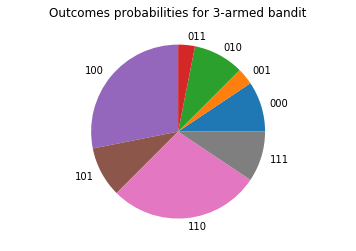

In [4]:
# show the PM game matrices and outcomes distributions
bandit.dump(plot=True, nice=True)

# note that for this example we have 3 actions (one for each arm) 
# and 2^3 outcomes (one for each possible reward vector)


***** 3-armed bandit *****
Actions: N=3 Outcomes: M=8

Loss Matrix (with actions as row indices and outcomes as column indices):


,000,001,010,011,100,101,110,111
arm 0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
arm 1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
arm 2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,000,001,010,011,100,101,110,111
arm 0,loss,loss,loss,loss,win,win,win,win
arm 1,loss,loss,win,win,loss,loss,win,win
arm 2,loss,win,loss,win,loss,win,loss,win


Feedback Matrix (numeric form):


,000,001,010,011,100,101,110,111
arm 0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
arm 1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
arm 2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(000)=0.0 P(001)=0.0 P(010)=0.0 P(011)=0.333333333333 P(100)=0.0 P(101)=0.333333333333 P(110)=0.333333333333 P(111)=0.0

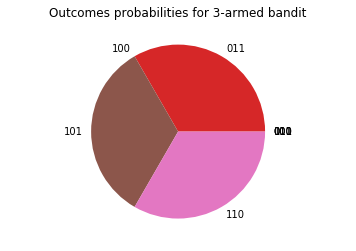

In [5]:
# We can also consider bandits with strongly correlated arms
# by specifying a for instance an outcome distribution 
# where only two arms can be winning at the same time
bandit.OutcomeDist = np.array([0,0,0,1/3.,0,1/3.,1/3.,0])
bandit.dump(plot=True, nice=True)


In [6]:
# Other well known instances of PM are dynamic pricing and Apple tasting

dp = pmlib.DynamicPricingPM([0.1,0.1,0.7,0.1], 2.)
at = pmlib.AppleTasting([0.05,0.95])

at.dump(nice=True)


***** Apple tasting game *****
Actions: N=2 Outcomes: M=2

Loss Matrix (with actions as row indices and outcomes as column indices):


,rotten,good
sell apple,1.0,0.0
taste apple,0.0,1.0



Feedback Matrix (symbolic form):


,rotten,good
sell apple,blind,blind
taste apple,rotten,good


Feedback Matrix (numeric form):


,rotten,good
sell apple,0.0,0.0
taste apple,1.0,-1.0



Outcomes distribution (for stochastic games):
P(rotten)=0.05 P(good)=0.95


In [7]:
# We can also create a dueling bandit instance where the action is a couple of arms 
# and the feedback is the relative reward.
print "** Dueling bandit problem"    
dueling = pmlib.BinaryUtilityDuelingBanditPM([0.75,0.5,0.5,0.25])
dueling.dump(plot=False,nice=True)

** Dueling bandit problem
***** 4-armed utility-based dueling bandit *****
Actions: N=10 Outcomes: M=16

Loss Matrix (with actions as row indices and outcomes as column indices):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
"(0,2)",1.0,1.0,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.0,0.0
"(0,3)",1.0,0.5,1.0,0.5,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0
"(1,1)",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(1,2)",1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0
"(1,3)",1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0
"(2,2)",1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(2,3)",1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0
"(3,3)",1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(0,1)",tie,tie,tie,tie,loss,loss,loss,loss,win,win,win,win,tie,tie,tie,tie
"(0,2)",tie,tie,loss,loss,tie,tie,loss,loss,win,win,tie,tie,win,win,tie,tie
"(0,3)",tie,loss,tie,loss,tie,loss,tie,loss,win,tie,win,tie,win,tie,win,tie
"(1,1)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(1,2)",tie,tie,loss,loss,win,win,tie,tie,tie,tie,loss,loss,win,win,tie,tie
"(1,3)",tie,loss,tie,loss,win,tie,win,tie,tie,loss,tie,loss,win,tie,win,tie
"(2,2)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(2,3)",tie,loss,win,tie,tie,loss,win,tie,tie,loss,win,tie,tie,loss,win,tie
"(3,3)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie


Feedback Matrix (numeric form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(0,2)",0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(0,3)",0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
"(1,1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1,2)",0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0
"(1,3)",0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0
"(2,2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2,3)",0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0
"(3,3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Outcomes distribution (for stochastic games):
P(0000)=0.046875 P(0001)=0.015625 P(0010)=0.046875 P(0011)=0.015625 P(0100)=0.046875 P(0101)=0.015625 P(0110)=0.046875 P(0111)=0.015625 P(1000)=0.140625 P(1001)=0.046875 P(1010)=0.140625 P(1011)=0.046875 P(1100)=0.140625 P(1101)=0.046875 P(1110)=0.140625 P(1111)=0.046875


kstar= 2.0 eta0= 0.347065959622 gamma0= 1.99716267569
2 x 2 Link matrix
Loss estimation error: 3.14018491737e-16
nbCores: 38 nbReps: 76 Horizon: 10000


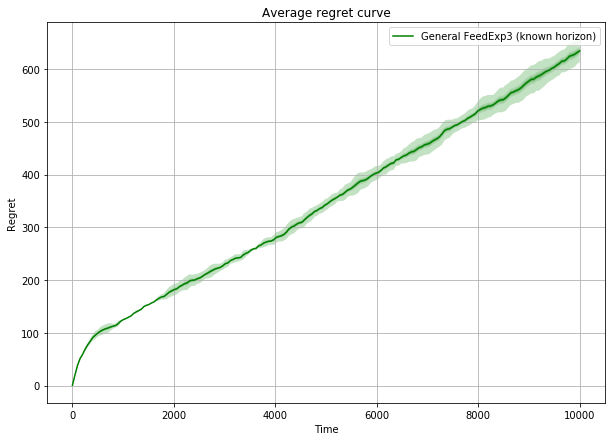

In [8]:
# The present version only include 4 variants of FeedExp3 algorithm.
# The BasicFeedexp3 class only works with some forms of numeric feedback matrices where
# there exists an NxN matrix K such that L=KF (See Piccolboni & Schindelhauer 2000).
# The GeneralFeedexp3 uses Cell decomposition to handle more general forms of feedbacks.
# The eta and gamma parameters can be optimized for known horizon.
# When these parameters are set to zero we use an anytime version whith dynamic eta and gamma parameters
# as specified in (Cesa-Bianchi et al. 2006).

from multiprocessing import cpu_count
nbCores = max(1,cpu_count() - 2)
nbReps = nbCores*2
horizon = 10000

pm_game = pmlib.AppleTasting([0.05,0.95])

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10.,7.]


eta, gamma = pmlib.optimal_Feedexp3_parameters(pm_game, horizon)
gfx3 = pmlib.GeneralFeedexp3(pm_game, eta , gamma)
cumRegrets1 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, gfx3)
pmlib.init_plot("Average regret curve")
pmlib.plot_regret(cumRegrets1, mylabel= "General FeedExp3 (known horizon)", mycolor = 'green')
pmlib.show_plot()
    

** FeedExp3
kstar= 2.0 eta0= 0.238399498807 gamma0= 10.7590383801
13 x 13 Link matrix
Loss estimation error: 1.8932946131e-14
nbCores: 38 nbReps: 76 Horizon: 10000
** Rex3
Number of arms: K=4
nbCores: 38 nbReps: 76 Horizon: 10000
** Random
nbCores: 38 nbReps: 76 Horizon: 10000


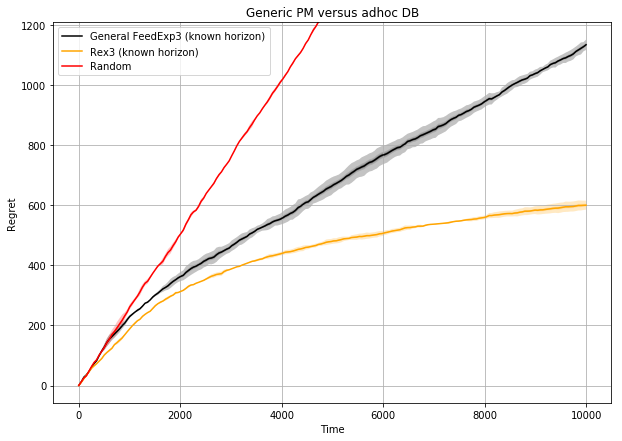

In [9]:
# for dueling bandit we can compare with an adhoc algorithm: rex3:

def plot_game(pm_game):

    # Feedexp3
    print "** FeedExp3"
    eta, gamma = pmlib.optimal_Feedexp3_parameters(pm_game, horizon)
    gfx3 = pmlib.GeneralFeedexp3(pm_game, eta , gamma)
    cumRegrets1 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, gfx3)

    #Rex3
    if pm_game.game_type=="dueling":
        print "** Rex3"
        rex3 = pmlib.Rex3(pm_game, pmlib.optimal_gamma(pm_game, horizon))
        cumRegrets2 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, rex3)

    # Random
    print "** Random"
    baseline = pmlib.BasicPolicy(pm_game)
    cumRegrets3 = pmlib.eval_policy_parallel(nbCores, nbReps, horizon, pm_game, baseline)

    pmlib.init_plot("Generic PM versus adhoc DB")
    pmlib.plot_regret(cumRegrets1, mylabel= "General FeedExp3 (known horizon)", mycolor = 'black')
    if pm_game.game_type=="dueling":
        pmlib.plot_regret(cumRegrets2, mylabel= "Rex3 (known horizon)", mycolor = 'orange')
    pmlib.plot_regret(cumRegrets3, mylabel= "Random", mycolor = 'red', autoscale = False)
    pmlib.show_plot()
    

plot_game(dueling)

# It is an open question whether a general PM algorithm can be as tight as an adhoc dueling bandits algorithm.





***** Easy Bandit *****
***** 3-armed bandit *****
Actions: N=3 Outcomes: M=8

Loss Matrix (with actions as row indices and outcomes as column indices):


,000,001,010,011,100,101,110,111
arm 0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
arm 1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
arm 2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,000,001,010,011,100,101,110,111
arm 0,loss,loss,loss,loss,win,win,win,win
arm 1,loss,loss,win,win,loss,loss,win,win
arm 2,loss,win,loss,win,loss,win,loss,win


Feedback Matrix (numeric form):


,000,001,010,011,100,101,110,111
arm 0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
arm 1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
arm 2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(000)=0.045 P(001)=0.005 P(010)=0.045 P(011)=0.005 P(100)=0.405 P(101)=0.045 P(110)=0.405 P(111)=0.045 ** FeedExp3
kstar= 1.0 eta0= 0.550932869406 gamma0= 2.51626729517
4 x 4 Link matrix
Loss estimation error: 2.21419223791e-15
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


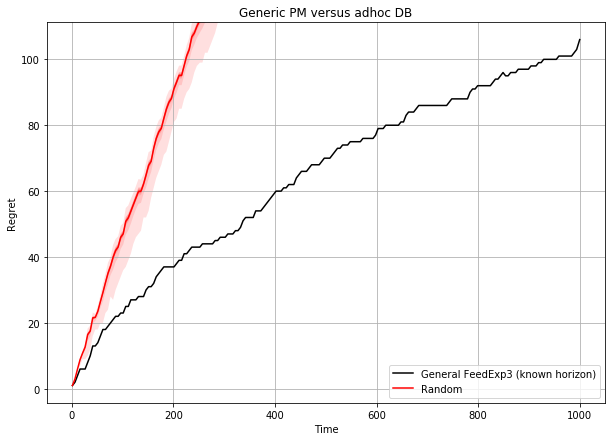



***** Hard Bandit *****
***** 4-armed bandit *****
Actions: N=4 Outcomes: M=16

Loss Matrix (with actions as row indices and outcomes as column indices):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
arm 0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm 1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
arm 2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
arm 3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
arm 0,loss,loss,loss,loss,loss,loss,loss,loss,win,win,win,win,win,win,win,win
arm 1,loss,loss,loss,loss,win,win,win,win,loss,loss,loss,loss,win,win,win,win
arm 2,loss,loss,win,win,loss,loss,win,win,loss,loss,win,win,loss,loss,win,win
arm 3,loss,win,loss,win,loss,win,loss,win,loss,win,loss,win,loss,win,loss,win


Feedback Matrix (numeric form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
arm 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
arm 1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
arm 2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
arm 3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(0000)=0.05 P(0001)=0.05 P(0010)=0.05 P(0011)=0.05 P(0100)=0.05 P(0101)=0.05 P(0110)=0.05 P(0111)=0.05 P(1000)=0.075 P(1001)=0.075 P(1010)=0.075 P(1011)=0.075 P(1100)=0.075 P(1101)=0.075 P(1110)=0.075 P(1111)=0.075 ** FeedExp3
kstar= 1.0 eta0= 0.524450522302 gamma0= 3.06880791227
5 x 5 Link matrix
Loss estimation error: 3.08992810553e-15
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


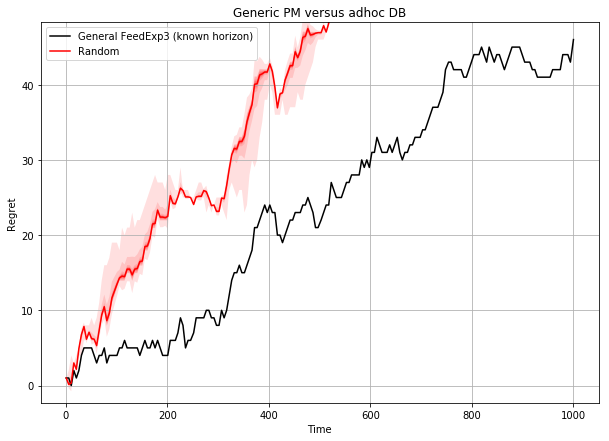



***** Four levels easy Dynamic Pricing (c=2) *****
***** 4-levels dynamic pricing *****
Actions: N=4 Outcomes: M=4

Loss Matrix (with actions as row indices and outcomes as column indices):


,0$,1$,2$,3$
0$,0.0,1.0,2.0,3.0
1$,2.0,0.0,1.0,2.0
2$,2.0,2.0,0.0,1.0
3$,2.0,2.0,2.0,0.0



Feedback Matrix (symbolic form):


,0$,1$,2$,3$
0$,sold,sold,sold,sold
1$,not-sold,sold,sold,sold
2$,not-sold,not-sold,sold,sold
3$,not-sold,not-sold,not-sold,sold


Feedback Matrix (numeric form):


,0$,1$,2$,3$
0$,1.0,1.0,1.0,1.0
1$,0.0,1.0,1.0,1.0
2$,0.0,0.0,1.0,1.0
3$,0.0,0.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(0$)=0.1 P(1$)=0.1 P(2$)=0.7 P(3$)=0.1 ** FeedExp3
kstar= 3.0 eta0= 0.264860898057 gamma0= 5.23404689515
4 x 4 Link matrix
Loss estimation error: 4.90512564663e-15
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


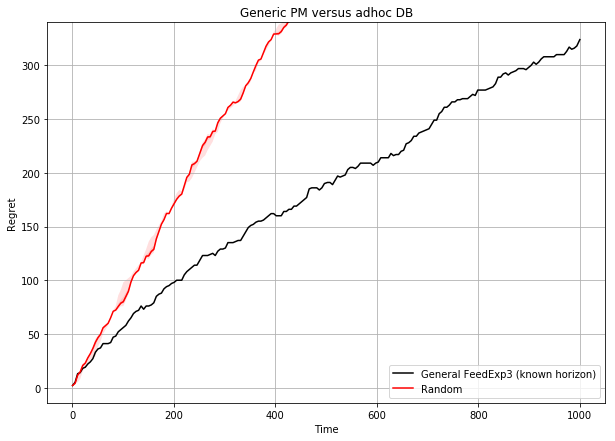



***** Five levels hard Dynamic Pricing (c=2) *****
***** 6-levels dynamic pricing *****
Actions: N=6 Outcomes: M=6

Loss Matrix (with actions as row indices and outcomes as column indices):


,0$,1$,2$,3$,4$,5$
0$,0.0,1.0,2.0,3.0,4.0,5.0
1$,2.0,0.0,1.0,2.0,3.0,4.0
2$,2.0,2.0,0.0,1.0,2.0,3.0
3$,2.0,2.0,2.0,0.0,1.0,2.0
4$,2.0,2.0,2.0,2.0,0.0,1.0
5$,2.0,2.0,2.0,2.0,2.0,0.0



Feedback Matrix (symbolic form):


,0$,1$,2$,3$,4$,5$
0$,sold,sold,sold,sold,sold,sold
1$,not-sold,sold,sold,sold,sold,sold
2$,not-sold,not-sold,sold,sold,sold,sold
3$,not-sold,not-sold,not-sold,sold,sold,sold
4$,not-sold,not-sold,not-sold,not-sold,sold,sold
5$,not-sold,not-sold,not-sold,not-sold,not-sold,sold


Feedback Matrix (numeric form):


,0$,1$,2$,3$,4$,5$
0$,1.0,1.0,1.0,1.0,1.0,1.0
1$,0.0,1.0,1.0,1.0,1.0,1.0
2$,0.0,0.0,1.0,1.0,1.0,1.0
3$,0.0,0.0,0.0,1.0,1.0,1.0
4$,0.0,0.0,0.0,0.0,1.0,1.0
5$,0.0,0.0,0.0,0.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(0$)=0.3 P(1$)=0.1 P(2$)=0.1 P(3$)=0.1 P(4$)=0.1 P(5$)=0.3 ** FeedExp3
kstar= 5.0 eta0= 0.170611123381 gamma0= 10.5020085075
6 x 6 Link matrix
Loss estimation error: 1.66814473088e-14
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


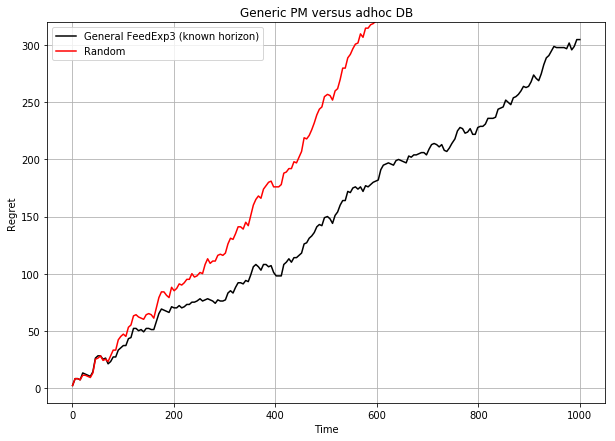



***** G. Bartok's thesis game *****
***** Bartok game *****
Actions: N=3 Outcomes: M=3

Loss Matrix (with actions as row indices and outcomes as column indices):


,0,1,2
0,1.0,1.0,0.0
1,0.0,1.0,1.0
2,1.0,0.0,1.0



Feedback Matrix (symbolic form):


,0,1,2
0,a,b,b
1,b,a,b
2,b,b,a


Feedback Matrix (numeric form):


,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0



Outcomes distribution (for stochastic games):
P(0)=0.333333333333 P(1)=0.333333333333 P(2)=0.333333333333 ** FeedExp3
kstar= 2.0 eta0= 0.347065959622 gamma0= 3.99432535138
4 x 4 Link matrix
Loss estimation error: 1.35064460289e-15
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


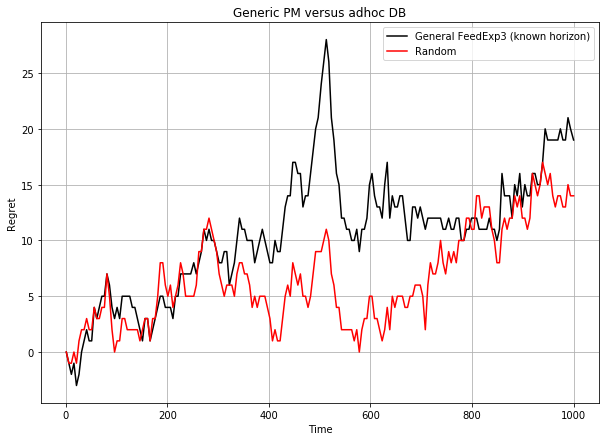



***** Apple tasting (organic food) *****
***** Apple tasting game *****
Actions: N=2 Outcomes: M=2

Loss Matrix (with actions as row indices and outcomes as column indices):


,rotten,good
sell apple,1.0,0.0
taste apple,0.0,1.0



Feedback Matrix (symbolic form):


,rotten,good
sell apple,blind,blind
taste apple,rotten,good


Feedback Matrix (numeric form):


,rotten,good
sell apple,0.0,0.0
taste apple,1.0,-1.0



Outcomes distribution (for stochastic games):
P(rotten)=0.05 P(good)=0.95 ** FeedExp3
kstar= 2.0 eta0= 0.347065959622 gamma0= 1.99716267569
2 x 2 Link matrix
Loss estimation error: 3.14018491737e-16
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


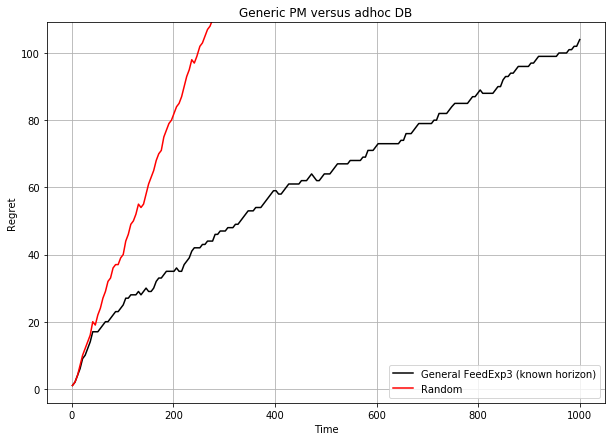



***** Apple tasting (supermarket) *****
***** Apple tasting game *****
Actions: N=2 Outcomes: M=2

Loss Matrix (with actions as row indices and outcomes as column indices):


,rotten,good
sell apple,1.0,0.0
taste apple,0.0,1.0



Feedback Matrix (symbolic form):


,rotten,good
sell apple,blind,blind
taste apple,rotten,good


Feedback Matrix (numeric form):


,rotten,good
sell apple,0.0,0.0
taste apple,1.0,-1.0



Outcomes distribution (for stochastic games):
P(rotten)=0.5 P(good)=0.5 ** FeedExp3
kstar= 2.0 eta0= 0.347065959622 gamma0= 1.99716267569
2 x 2 Link matrix
Loss estimation error: 3.14018491737e-16
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


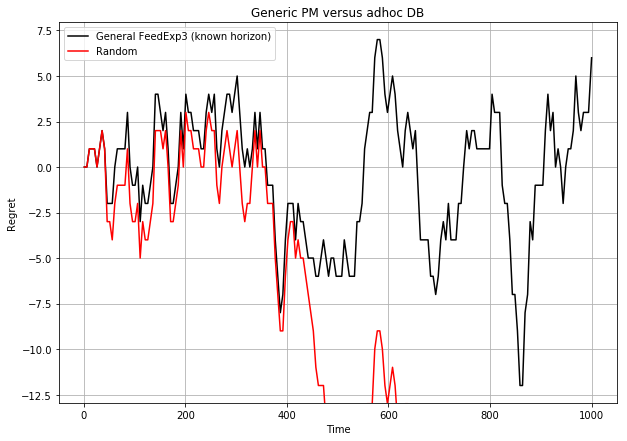



***** Intractable *****
***** Intractable *****
Actions: N=2 Outcomes: M=2

Loss Matrix (with actions as row indices and outcomes as column indices):


,no,yes
ask,1.0,0.0
not-ask,0.0,1.0



Feedback Matrix (symbolic form):


,no,yes
ask,maybe,maybe
not-ask,who-knows,who-kowns


Feedback Matrix (numeric form):


,no,yes
ask,1.0,1.0
not-ask,2.0,2.0



Outcomes distribution (for stochastic games):
P(no)=0.75 P(yes)=0.25 ** FeedExp3
kstar= 1.0 eta0= 0.550932869406 gamma0= 1.25813364758
2 x 2 Link matrix
Loss estimation error: 1.41421356237
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


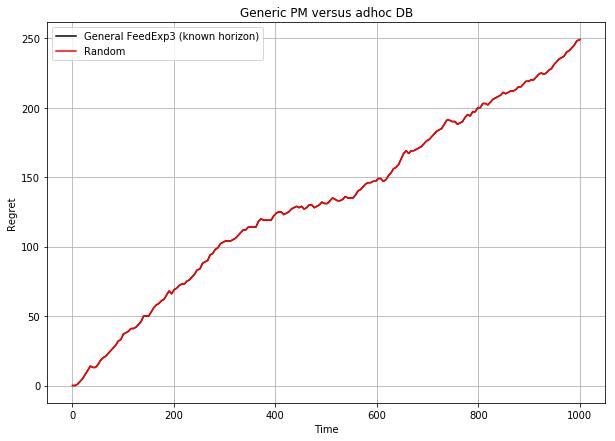



***** Label efficient prediction *****
***** Label-efficient prediction *****
Actions: N=3 Outcomes: M=2

Loss Matrix (with actions as row indices and outcomes as column indices):


,ham,spam
ask user,1.0,1.0
transfer email,0.0,1.0
drop email,2.0,0.0



Feedback Matrix (symbolic form):


,ham,spam
ask user,ham,spam
transfer email,blind,blind
drop email,blind,blind


Feedback Matrix (numeric form):


,ham,spam
ask user,-1.0,1.0
transfer email,0.0,0.0
drop email,0.0,0.0



Outcomes distribution (for stochastic games):
P(ham)=0.75 P(spam)=0.25 ** FeedExp3
kstar= 2.0 eta0= 0.347065959622 gamma0= 3.99432535138
4 x 4 Link matrix
Loss estimation error: 0.0
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


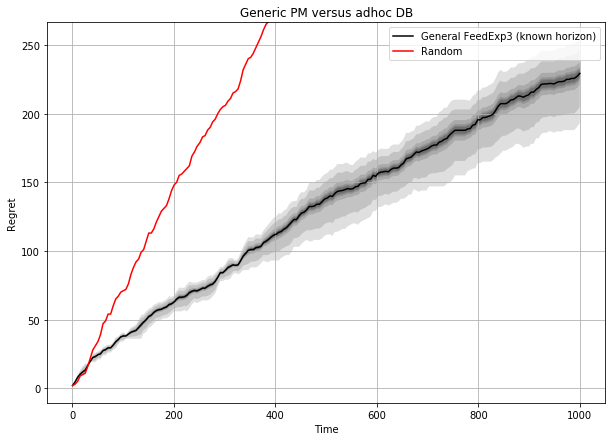



***** Easy Dueling Bandit *****
***** 3-armed utility-based dueling bandit *****
Actions: N=6 Outcomes: M=8

Loss Matrix (with actions as row indices and outcomes as column indices):


,000,001,010,011,100,101,110,111
"(0,0)",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(0,1)",1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0
"(0,2)",1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0
"(1,1)",1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(1,2)",1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0
"(2,2)",1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,000,001,010,011,100,101,110,111
"(0,0)",tie,tie,tie,tie,tie,tie,tie,tie
"(0,1)",tie,tie,loss,loss,win,win,tie,tie
"(0,2)",tie,loss,tie,loss,win,tie,win,tie
"(1,1)",tie,tie,tie,tie,tie,tie,tie,tie
"(1,2)",tie,loss,win,tie,tie,loss,win,tie
"(2,2)",tie,tie,tie,tie,tie,tie,tie,tie


Feedback Matrix (numeric form):


,000,001,010,011,100,101,110,111
"(0,0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0
"(0,2)",0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0
"(1,1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1,2)",0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0
"(2,2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Outcomes distribution (for stochastic games):
P(000)=0.045 P(001)=0.005 P(010)=0.045 P(011)=0.005 P(100)=0.405 P(101)=0.045 P(110)=0.405 P(111)=0.045 ** FeedExp3
kstar= 2.0 eta0= 0.28649663731 gamma0= 7.25817085047
8 x 8 Link matrix
Loss estimation error: 3.30839010093e-15
nbCores: 38 nbReps: 38 Horizon: 1000
** Rex3
Number of arms: K=3
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


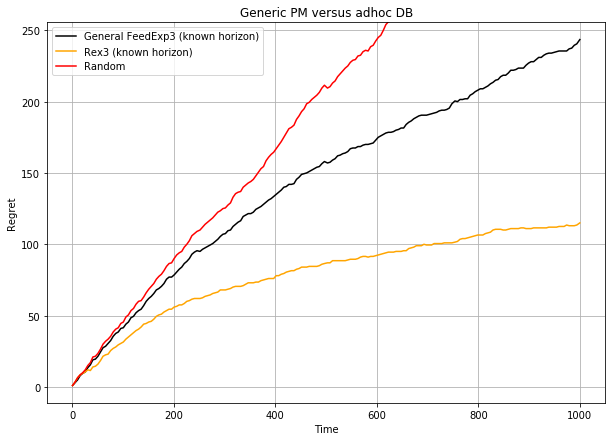



***** Hard Dueling Bandit *****
***** 4-armed utility-based dueling bandit *****
Actions: N=10 Outcomes: M=16

Loss Matrix (with actions as row indices and outcomes as column indices):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0
"(0,2)",1.0,1.0,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.0,0.0
"(0,3)",1.0,0.5,1.0,0.5,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0
"(1,1)",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(1,2)",1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0
"(1,3)",1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.0
"(2,2)",1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(2,3)",1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0,1.0,0.5,0.5,0.0
"(3,3)",1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(0,1)",tie,tie,tie,tie,loss,loss,loss,loss,win,win,win,win,tie,tie,tie,tie
"(0,2)",tie,tie,loss,loss,tie,tie,loss,loss,win,win,tie,tie,win,win,tie,tie
"(0,3)",tie,loss,tie,loss,tie,loss,tie,loss,win,tie,win,tie,win,tie,win,tie
"(1,1)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(1,2)",tie,tie,loss,loss,win,win,tie,tie,tie,tie,loss,loss,win,win,tie,tie
"(1,3)",tie,loss,tie,loss,win,tie,win,tie,tie,loss,tie,loss,win,tie,win,tie
"(2,2)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie
"(2,3)",tie,loss,win,tie,tie,loss,win,tie,tie,loss,win,tie,tie,loss,win,tie
"(3,3)",tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie,tie


Feedback Matrix (numeric form):


,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
"(0,0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0,1)",0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
"(0,2)",0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
"(0,3)",0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
"(1,1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1,2)",0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,0.0,0.0
"(1,3)",0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0
"(2,2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2,3)",0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0
"(3,3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Outcomes distribution (for stochastic games):
P(0000)=0.05 P(0001)=0.05 P(0010)=0.05 P(0011)=0.05 P(0100)=0.05 P(0101)=0.05 P(0110)=0.05 P(0111)=0.05 P(1000)=0.075 P(1001)=0.075 P(1010)=0.075 P(1011)=0.075 P(1100)=0.075 P(1101)=0.075 P(1110)=0.075 P(1111)=0.075 ** FeedExp3
kstar= 2.0 eta0= 0.238399498807 gamma0= 10.7590383801
13 x 13 Link matrix
Loss estimation error: 9.86912710889e-15
nbCores: 38 nbReps: 38 Horizon: 1000
** Rex3
Number of arms: K=4
nbCores: 38 nbReps: 38 Horizon: 1000
** Random
nbCores: 38 nbReps: 38 Horizon: 1000


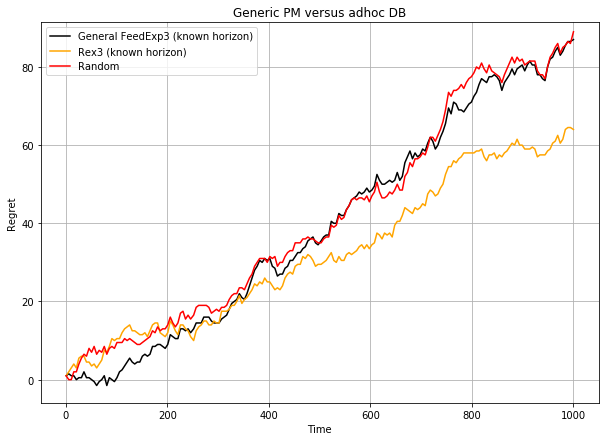

In [10]:
# we provide a list of benchmark games settings:
horizon = 1000
nbReps = nbCores


for i in range(len(pmlib.benchmark_games)):
    print
    print
    print "*****", pmlib.benchmark_names[i], "*****"
    game = pmlib.benchmark_games[i]
    game.dump(plot=False, nice = True) # set plot=True to plot the outcome distributions
    plot_game(game)

In [11]:
# For Cell decomposition we use the ppl library
import ppl

pm_game = pmlib.BinaryUtilityDuelingBanditPM([0.75,0.5])
pm_game.dump(nice=True)


Lmat = pm_game.LossMatrix

print "Loss matrix:"
print Lmat
for i in range(Lmat.shape[0]):
    print 
    print "Domination matrix for action", pm_game.Actions_dict[i], ":"
    print pmlib.domination_matrix(i,Lmat)
    print "Strict Domination polytope:", pmlib.StrictDominationPolytope(i,Lmat).minimized_generators()
    print "Strict Domination polytope:", pmlib.StrictDominationPolytope(i,Lmat).minimized_constraints()
    print "strictly dominating:", pmlib.isStrictlyNonDominated(i,Lmat)
    print "Domination polytope:", pmlib.DominationPolytope(i,Lmat).minimized_generators()
    print "dominating:", pmlib.isNonDominated(i,Lmat)
    print "degenerated:", pmlib.isDegenerated(i,Lmat)
    print "Pareto Optimal:", pmlib.isParetoOptimal(i, Lmat)
    


***** 2-armed utility-based dueling bandit *****
Actions: N=3 Outcomes: M=4

Loss Matrix (with actions as row indices and outcomes as column indices):


,00,01,10,11
"(0,0)",1.0,1.0,0.0,0.0
"(0,1)",1.0,0.5,0.5,0.0
"(1,1)",1.0,0.0,1.0,0.0



Feedback Matrix (symbolic form):


,00,01,10,11
"(0,0)",tie,tie,tie,tie
"(0,1)",tie,loss,win,tie
"(1,1)",tie,tie,tie,tie


Feedback Matrix (numeric form):


,00,01,10,11
"(0,0)",0.0,0.0,0.0,0.0
"(0,1)",0.0,-1.0,1.0,0.0
"(1,1)",0.0,0.0,0.0,0.0



Outcomes distribution (for stochastic games):
P(00)=0.125 P(01)=0.125 P(10)=0.375 P(11)=0.375 Loss matrix:
[[ 1.   1.   0.   0. ]
 [ 1.   0.5  0.5  0. ]
 [ 1.   0.   1.   0. ]]

Domination matrix for action (0,0) :
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.   1.  -1.   0. ]]
Strict Domination polytope: Generator_System {closure_point(0/1, 0/1, 0/1, 1/1), point(0/1, 0/1, 1/1, 0/1), closure_point(0/2, 1/2, 1/2, 0/2), closure_point(1/1, 0/1, 0/1, 0/1)}
Strict Domination polytope: Constraint_System {x0+x1+x2+x3-1==0, -x1+x2>0, x0>=0, -x0-x1-x2+1>=0, x1>=0}
strictly dominating: True
Domination polytope: Generator_System {point(1/1, 0/1, 0/1, 0/1), point(0/1, 0/1, 0/1, 1/1), point(0/1, 0/1, 1/1, 0/1), point(0/2, 1/2, 1/2, 0/2)}
dominating: True
degenerated: False
Pareto Optimal: True

Domination matrix for action (0,1) :
[[ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]]
Strict Domination polytope: Generator_System {}
Strict Domination polytope: Constraint_System